In [ ]:
# !pip install pycaret
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade
!pip install openai
!pip install --upgrade openai
!pip install openai==1.55.3 httpx==0.27.2

# GEN ALL POSIBLE DATA



In [ ]:
import itertools

data_features = {
    "gender": ["Man", "Woman", "Trans Man", "Trans Woman", "Non-binary", "Prefer not to answer"],
    "last_6_months": ["No", "Yes"],
    "partner_gender": ["Male", "Female", "Both", "Non-binary"],
    "partner_multiple": ["No", "Yes"],
    "sex_kind": ["Anal", "Vaginal", "Anal",  "Oral"],
    "partner_discuss": ["No", "Yes"],
    "partner_hiv_status": ["I don’t ask", "Sometimes", "Always"],
    "partner_condom": ["Rarely or never", "Sometimes", "Always"],
    "sti_6_months": ["Never", "Unsure", "Yes"],
    "injected_drugs": ["Never", "Yes"],
    "sex_party": ["No", "Yes"],
    "sex_for_money": ["No", "Prefer Not to answer", "Yes"],
    "doctor_6": ["0", "1"]
}

combinations = list(itertools.product(*data_features.values()))

combination_dicts = [
    dict(zip(data_features.keys(), combination)) for combination in combinations
]

len(combination_dicts)

497664

In [ ]:
data_features.keys()

Specifically, the Centers for Disease Control and Prevention (CDC) recommends that you should consider PrEP if you are HIV negative,

- have had anal or vaginal sex in the past 6 months, and:
 - have a sexual partner with HIV (especially if the partner has an unknown or detectable viral load), or
 - have not consistently used a condom, or
 - have been diagnosed with a sexually transmitted infection (STI)in the past 6 months.

PrEP is also recommended if you
- inject drugs and you:
 - have an injection partner with HIV, or
 - share needles, syringes, or other equipment to inject drugs.

PrEP should also be considered for people without HIV who
- have been prescribed non-occupational post-exposure prophylaxis (nPEP) and:
 - report continued risk behavior, or
 - have used multiple courses of PEP.

# DATA

## Get Data

In [ ]:
import pandas as pd

data_path = "./data/data2000_HIVrisk.csv"

df = pd.read_csv(data_path)#, encoding='latin-1')
df = df.rename(columns={"doctor_6": "HIV_risk"})
df.keys()

Index(['Unnamed: 0', 'gender', 'last_6_months', 'partner_gender',
       'partner_multiple', 'sex_kind', 'partner_discuss', 'partner_hiv_status',
       'partner_condom', 'sti_6_months', 'injected_drugs', 'sex_party',
       'sex_for_money', 'HIV_risk'],
      dtype='object')

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-" * 20)  # Separator for readability

Column: Unnamed: 0
Unique Values: [   1    2    3 ... 1998 1999 2000]
--------------------
Column: gender
Unique Values: ['Man' 'Non-binary' 'Prefer not to answer' 'Trans man' 'Trans woman'
 'Woman']
--------------------
Column: last_6_months
Unique Values: ['No' 'Yes']
--------------------
Column: partner_gender
Unique Values: ['Both' 'Female' 'Male' 'Non-binary' 'Male, Non-binary'
 'Female, Non-binary' 'Woman']
--------------------
Column: partner_multiple
Unique Values: ['No' 'Yes']
--------------------
Column: sex_kind
Unique Values: ['Anal' 'Anal, Oral' 'Oral' 'Vaginal' 'Vaginal, Anal'
 'Vaginal, Anal, Oral' 'Vaginal, Oral']
--------------------
Column: partner_discuss
Unique Values: ['No' 'Yes']
--------------------
Column: partner_hiv_status
Unique Values: ['Always' 'I don’t ask' 'Sometimes']
--------------------
Column: partner_condom
Unique Values: ['Always' 'Rarely or never' 'Sometimes']
--------------------
Column: sti_6_months
Unique Values: ['Never' 'Yes' 'Unsure']
-------

#Machine Learning

## Encoding

In [ ]:
import pandas as pd

data_features = {
  "gender": ["Man", "Woman", "Trans man", "Trans Woman", "Non-binary", "Prefer not to answer"],
  "last_6_months": ["No", "Yes"],
  "partner_gender": ["Male", "Female", "Both", "Non-binary"],
  "partner_multiple": ["No", "Yes"],
  "sex_kind": ["Vaginal", "Anal", "Oral"],
  "partner_discuss": ["No", "Yes"],
  "partner_hiv_status": ["I don’t ask", "Sometimes", "Always"],
  "partner_condom": ["Rarely or never", "Sometimes", "Always"],
  "sti_6_months": ["Never", "Unsure", "Yes"],
  "injected_drugs": ["Never", "Yes"],
  "sex_party": ["No", "Yes"],
  "sex_for_money": ["No", "Prefer Not to answer", "Yes"],
  "doctor_6": [0, 1]
}

##### Define Mapping #####
# Gender
yesno_mapping = {'No': 0, 'Yes': 1}

# 1
gender_mapping = {
  "Man": 0,
  "Woman": 1,
  "Non-binary": 2,
  "Trans man": 3,
  "Trans woman": 4,
  "Prefer not to answer": 5
}

#2
last_6_months_mapping = yesno_mapping

#3
partner_gender_mapping ={
  "Male": 0,
  "Female": 1,
  "Both": 2,
  "Non-binary": 3
}
partner_gender_class = list(partner_gender_mapping.keys())

#4
partner_multiple_mapping = yesno_mapping

#5
sex_kind_mapping ={
  "Oral":0,
  "Vaginal": 1,
  "Anal": 2
}
sex_kind_class = list(sex_kind_mapping.keys())

#6
partner_discuss_mapping = yesno_mapping

#7
partner_hiv_status_mapping = {
  'I don’t ask': 0,
  'Sometimes': 1,
  'Always': 2
}

#8
partner_condom_mapping = {
  "Rarely or never": 0,
  "Sometimes": 1,
  "Always": 2
}

#9
sti_6_months_mapping = {
  "Never": 0,
  "Unsure": 1,
  "Yes":2
}

#10
injected_drugs_mapping = {
  "Never": 0,
  "Yes": 1
}

#11
sex_party_mapping = yesno_mapping

#12
sex_for_money_mapping = {
  "No": 0,
  "Prefer Not to answer": 1,
  "Yes":2
}

#13
HIV_risk_mapping = {
  0: 0,
  1: 1
}

def df2dfencode(df):

  ##### Mapping #####
  # Create a copy of the original DataFrame for encoding
  df_encode = pd.DataFrame()

  #1 Encoding Gender
  df_encode['gender'] = df['gender'].map(gender_mapping)

  #2 Encoding Last 6 Months
  df_encode['last_6_months'] = df['last_6_months'].map(last_6_months_mapping)

  #3 Encoding Partner Gender (Multi-Label Binarizer)
  partner_gender_list = df['partner_gender'].str.split(',').apply(lambda x: [item.strip() for item in x])
  partner_gender_class = ["Male", "Female", "Both", "Non-binary"]
  partner_gender_encoded = {
      f"partner_gender_{col}": partner_gender_list.apply(lambda x: col in x) for col in partner_gender_class
  }
  partner_gender_df = pd.DataFrame(partner_gender_encoded).astype(int)
  df_encode = pd.concat([df_encode, partner_gender_df], axis=1)

  #4 Encoding Partner Multiple
  df_encode['partner_multiple'] = df['partner_multiple'].map(partner_multiple_mapping)

  #5 Encoding Sex Kind (Multi-Label Binarizer)
  sex_kind_list = df['sex_kind'].str.split(',').apply(lambda x: [item.strip() for item in x])
  sex_kind_class = ['Oral', 'Vaginal', 'Anal']
  sex_kind_encoded = {
      f"sex_kind_gender_{col}": sex_kind_list.apply(lambda x: col in x) for col in sex_kind_class
  }
  sex_kind_df = pd.DataFrame(sex_kind_encoded).astype(int)
  df_encode = pd.concat([df_encode, sex_kind_df], axis=1)


  #6 Encoding Partner Discuss
  df_encode['partner_discuss'] = df['partner_discuss'].map(partner_discuss_mapping)

  #7 Encoding Partner HIV Status
  df_encode['partner_hiv_status'] = df['partner_hiv_status'].map(partner_hiv_status_mapping)

  #8 Encoding Partner Condom
  df_encode['partner_condom'] = df['partner_condom'].map(partner_condom_mapping)

  #9 Encoding STI in 6 Months
  df_encode['sti_6_months'] = df['sti_6_months'].map(sti_6_months_mapping)

  #10 Encoding Injected Drugs
  df_encode['injected_drugs'] = df['injected_drugs'].map(injected_drugs_mapping)

  #11 Encoding Sex Party
  df_encode['sex_party'] = df['sex_party'].map(sex_party_mapping)

  #12 Encoding Sex for Money
  df_encode['sex_for_money'] = df['sex_for_money'].map(sex_for_money_mapping)

  #13 Encoding Doctor Recommends PrEP as probabilities
  if "HIV_risk" in df.columns:
    df_encode['HIV_risk'] = df['HIV_risk'].map(HIV_risk_mapping)

  return df_encode

In [ ]:
df_encode = df2dfencode(df)
print(df_encode['HIV_risk'].value_counts(), df_encode.keys())

HIV_risk
1    1336
0     664
Name: count, dtype: int64 Index(['gender', 'last_6_months', 'partner_gender_Male',
       'partner_gender_Female', 'partner_gender_Both',
       'partner_gender_Non-binary', 'partner_multiple', 'sex_kind_gender_Oral',
       'sex_kind_gender_Vaginal', 'sex_kind_gender_Anal', 'partner_discuss',
       'partner_hiv_status', 'partner_condom', 'sti_6_months',
       'injected_drugs', 'sex_party', 'sex_for_money', 'HIV_risk'],
      dtype='object')


## Upsampling

In [ ]:
from sklearn.utils import resample

random_state = 42

classes = []
classes_number = []
for label in HIV_risk_mapping.values():
  classes.append(df_encode[df_encode['HIV_risk'] == label])
  classes_number.append(len(classes[-1]))


# Find the class with the maximum count
max_count = max(classes_number)

classes_upsampled = []
for class_df in classes:
  # Upsample each class to match the maximum count
  class_upsampled = resample(class_df, replace=True, n_samples=max_count, random_state=random_state)
  classes_upsampled.append(class_upsampled)

df_upsampled = pd.concat(classes_upsampled)
df_upsampled = df_upsampled.sample(frac=1, random_state=random_state).reset_index(drop=True)
print(df_upsampled['HIV_risk'].value_counts())

HIV_risk
1    1336
0    1336
Name: count, dtype: int64


## Training

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from pycaret.classification import setup, compare_models, finalize_model, save_model

all_features = list(df_encode.keys())

chosen_features = all_features

data_df = df_encode[chosen_features]

target = 'HIV_risk'
X = data_df.drop(target, axis=1)
y = data_df[target]

all_data_df = pd.concat([X, y], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

train_data_df = pd.concat([X_train, y_train], axis=1)
test_data_df = pd.concat([X_test, y_test], axis=1)

s = setup(
    data=train_data_df,
    target=target,
    session_id=123,
    normalize=True,
    feature_selection=False,
    fold_strategy='stratifiedkfold',
    fold=100,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,
    use_gpu=True
)

best_models = compare_models(sort='Accuracy', n_select=15)

final_models = []
for model in best_models:
    final_model = finalize_model(model)
    final_models.append(final_model)

best_final_model = final_models[0]

save_model(best_final_model, 'optimized_best_model')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,HIV_risk
2,Target type,Binary
3,Original data shape,"(2146, 18)"
4,Transformed data shape,"(2146, 18)"
5,Transformed train set shape,"(1502, 18)"
6,Transformed test set shape,"(644, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9560,0.9906,0.9495,0.9646,0.9549,0.9117,0.9153,0.1523
lightgbm,Light Gradient Boosting Machine,0.9553,0.9903,0.9491,0.9638,0.9540,0.9103,0.9145,0.1668
et,Extra Trees Classifier,0.9527,0.9716,0.9468,0.9620,0.9519,0.9050,0.9094,0.4789
gbc,Gradient Boosting Classifier,0.9507,0.9876,0.9377,0.9664,0.9493,0.9009,0.9051,0.2878
rf,Random Forest Classifier,0.9480,0.9890,0.9346,0.9642,0.9466,0.8956,0.9005,0.3787
dt,Decision Tree Classifier,0.9447,0.9463,0.9339,0.9585,0.9432,0.8890,0.8940,0.0513
knn,K Neighbors Classifier,0.9061,0.9598,0.8720,0.9422,0.9000,0.8115,0.8214,0.0536
ada,Ada Boost Classifier,0.9020,0.9690,0.9004,0.9097,0.8996,0.8033,0.8121,0.2029
lr,Logistic Regression,0.9014,0.9672,0.8884,0.9204,0.8978,0.8019,0.8114,0.1530
qda,Quadratic Discriminant Analysis,0.8908,0.9538,0.8434,0.9385,0.8810,0.7810,0.7927,0.0932


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'last_6_months',
                                              'partner_gender_Male',
                                              'partner_gender_Female',
                                              'partner_gender_Both',
                                              'partner_gender_Non-binary',
                                              'partner_multiple',
                                              'sex_kind_gender_Oral',
                                              'sex_kind_gender_Vaginal',
                                              'sex_kind_gender_Anal',
                                              'partner_discuss',
                                              'partner_hiv_...
                                importance_type=None,
                                interaction_constrai

In [ ]:
len(final_models)

15

In [ ]:
import pandas as pd
from pycaret.classification import predict_model, pull

# Combine features and target into one DataFrame (if needed)
all_data_df = pd.concat([X, y], axis=1)

# Evaluation Data
evaluation_data_df = test_data_df

# List to store all model predictions
combined_results = []

for i, model in enumerate(final_models):
    # Make predictions
    evaluation_results = predict_model(model, data=test_data_df)

    # Add a column to identify which model made the predictions
    evaluation_results["Model_ID"] = f"Model_{i+1}"

    # Store results in the list
    combined_results.append(evaluation_results)

# Concatenate all results into a single DataFrame
final_combined_df = pd.concat(combined_results, ignore_index=True)

# Save combined predictions to CSV
final_combined_df.to_csv("combined_test_data_predictions.csv", index=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9400,0.9895,0.9430,0.9650,0.9538,0.8682,0.8686


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9450,0.9907,0.9544,0.9617,0.9580,0.8783,0.8784


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9375,0.9539,0.9544,0.9508,0.9526,0.8610,0.8610


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9475,0.9848,0.9506,0.9690,0.9597,0.8844,0.8848


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9475,0.9866,0.9582,0.9618,0.9600,0.8836,0.8837


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9400,0.9410,0.9506,0.9579,0.9542,0.8672,0.8673


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8800,0.9449,0.8783,0.9352,0.9059,0.7408,0.7436


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8900,0.9563,0.9125,0.9195,0.9160,0.7566,0.7567


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8750,0.9518,0.8935,0.9144,0.9038,0.7253,0.7257


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8825,0.9308,0.8935,0.9252,0.9091,0.7432,0.7441


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8675,0.8660,0.8707,0.9234,0.8963,0.7133,0.7157


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8675,0.9458,0.8707,0.9234,0.8963,0.7133,0.7157


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8550,0.8425,0.8821,0.8958,0.8889,0.6803,0.6805


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7400,0.8658,0.6996,0.8804,0.7797,0.4725,0.4913


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
from pycaret.classification import predict_model, pull

all_data_df = pd.concat([X, y], axis=1)

evaluation_data_df = test_data_df

for i in range(len(final_models)):

  model = final_models[i]

  evaluation_results = predict_model(model, data=test_data_df)

  print("Evaluation Metrics on Test Data:")
  metrics = pull()
  print(metrics)

  evaluation_results.to_csv('test_data_predictions'+"_"+str(i)+".csv", index=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9400,0.9895,0.9430,0.9650,0.9538,0.8682,0.8686


Evaluation Metrics on Test Data:
                       Model  Accuracy     AUC  Recall  Prec.      F1   Kappa  \
0  Extreme Gradient Boosting      0.94  0.9895   0.943  0.965  0.9538  0.8682   

      MCC  
0  0.8686  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9450,0.9907,0.9544,0.9617,0.9580,0.8783,0.8784


Evaluation Metrics on Test Data:
                             Model  Accuracy     AUC  Recall   Prec.     F1  \
0  Light Gradient Boosting Machine     0.945  0.9907  0.9544  0.9617  0.958   

    Kappa     MCC  
0  0.8783  0.8784  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9375,0.9539,0.9544,0.9508,0.9526,0.8610,0.8610


Evaluation Metrics on Test Data:
                    Model  Accuracy     AUC  Recall   Prec.      F1  Kappa  \
0  Extra Trees Classifier    0.9375  0.9539  0.9544  0.9508  0.9526  0.861   

     MCC  
0  0.861  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9475,0.9848,0.9506,0.9690,0.9597,0.8844,0.8848


Evaluation Metrics on Test Data:
                          Model  Accuracy     AUC  Recall  Prec.      F1  \
0  Gradient Boosting Classifier    0.9475  0.9848  0.9506  0.969  0.9597   

    Kappa     MCC  
0  0.8844  0.8848  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9475,0.9866,0.9582,0.9618,0.9600,0.8836,0.8837


Evaluation Metrics on Test Data:
                      Model  Accuracy     AUC  Recall   Prec.    F1   Kappa  \
0  Random Forest Classifier    0.9475  0.9866  0.9582  0.9618  0.96  0.8836   

      MCC  
0  0.8837  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9400,0.9410,0.9506,0.9579,0.9542,0.8672,0.8673


Evaluation Metrics on Test Data:
                      Model  Accuracy    AUC  Recall   Prec.      F1   Kappa  \
0  Decision Tree Classifier      0.94  0.941  0.9506  0.9579  0.9542  0.8672   

      MCC  
0  0.8673  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8800,0.9449,0.8783,0.9352,0.9059,0.7408,0.7436


Evaluation Metrics on Test Data:
                    Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  K Neighbors Classifier      0.88  0.9449  0.8783  0.9352  0.9059  0.7408   

      MCC  
0  0.7436  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8900,0.9563,0.9125,0.9195,0.9160,0.7566,0.7567


Evaluation Metrics on Test Data:
                  Model  Accuracy     AUC  Recall   Prec.     F1   Kappa  \
0  Ada Boost Classifier      0.89  0.9563  0.9125  0.9195  0.916  0.7566   

      MCC  
0  0.7567  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8750,0.9518,0.8935,0.9144,0.9038,0.7253,0.7257


Evaluation Metrics on Test Data:
                 Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression     0.875  0.9518  0.8935  0.9144  0.9038  0.7253   

      MCC  
0  0.7257  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8825,0.9308,0.8935,0.9252,0.9091,0.7432,0.7441


Evaluation Metrics on Test Data:
                             Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Quadratic Discriminant Analysis    0.8825  0.9308  0.8935  0.9252  0.9091   

    Kappa     MCC  
0  0.7432  0.7441  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8675,0.8660,0.8707,0.9234,0.8963,0.7133,0.7157


Evaluation Metrics on Test Data:
              Model  Accuracy    AUC  Recall   Prec.      F1   Kappa     MCC
0  Ridge Classifier    0.8675  0.866  0.8707  0.9234  0.8963  0.7133  0.7157


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8675,0.9458,0.8707,0.9234,0.8963,0.7133,0.7157


Evaluation Metrics on Test Data:
                          Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Linear Discriminant Analysis    0.8675  0.9458  0.8707  0.9234  0.8963   

    Kappa     MCC  
0  0.7133  0.7157  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8550,0.8425,0.8821,0.8958,0.8889,0.6803,0.6805


Evaluation Metrics on Test Data:
                 Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  SVM - Linear Kernel     0.855  0.8425  0.8821  0.8958  0.8889  0.6803   

      MCC  
0  0.6805  


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7400,0.8658,0.6996,0.8804,0.7797,0.4725,0.4913


Evaluation Metrics on Test Data:
         Model  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0  Naive Bayes      0.74  0.8658  0.6996  0.8804  0.7797  0.4725  0.4913


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Evaluation Metrics on Test Data:
              Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0  Dummy Classifier    0.3425  0.5     0.0    0.0  0.0    0.0  0.0


## Testing

In [ ]:
test_data_df['HIV_risk'].value_counts()

,count
HIV_risk,
1,263
0,137


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9400,0.9895,0.9430,0.9650,0.9538,0.8682,0.8686


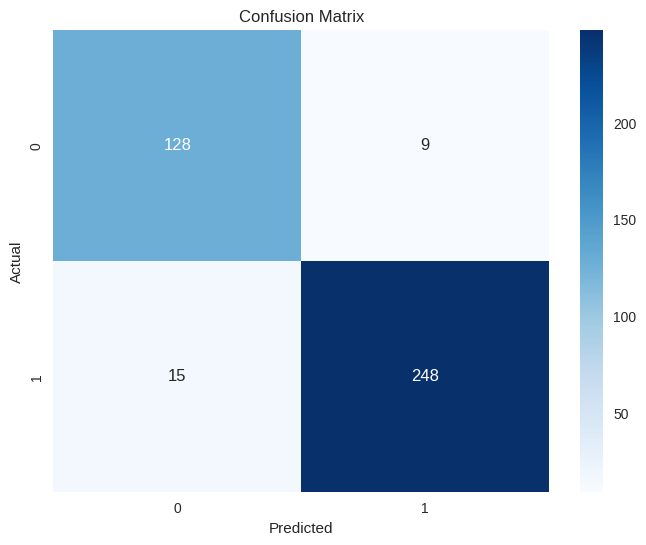

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       137
           1       0.96      0.94      0.95       263

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9450,0.9907,0.9544,0.9617,0.9580,0.8783,0.8784


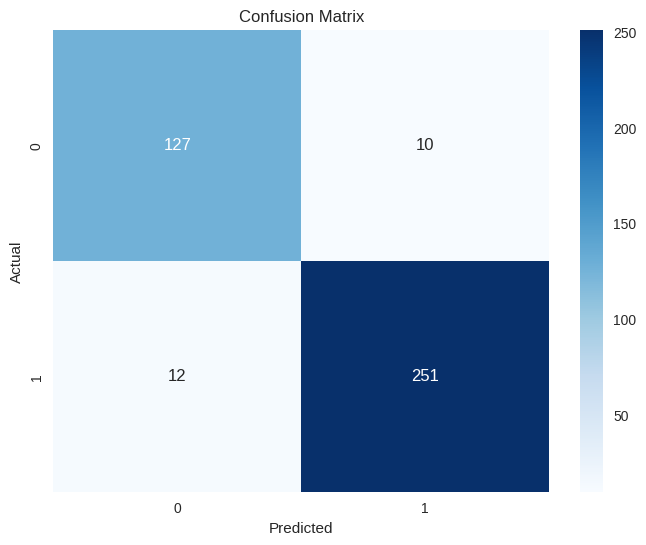

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       137
           1       0.96      0.95      0.96       263

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.95       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9375,0.9539,0.9544,0.9508,0.9526,0.8610,0.8610


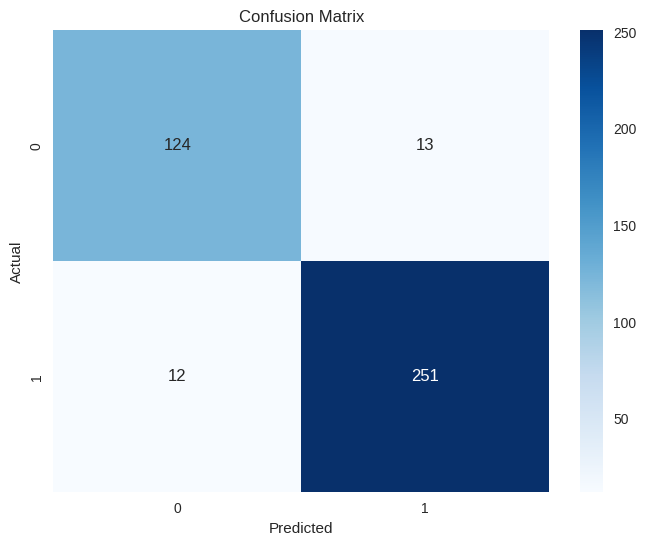

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       137
           1       0.95      0.95      0.95       263

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.94      0.94      0.94       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9475,0.9848,0.9506,0.9690,0.9597,0.8844,0.8848


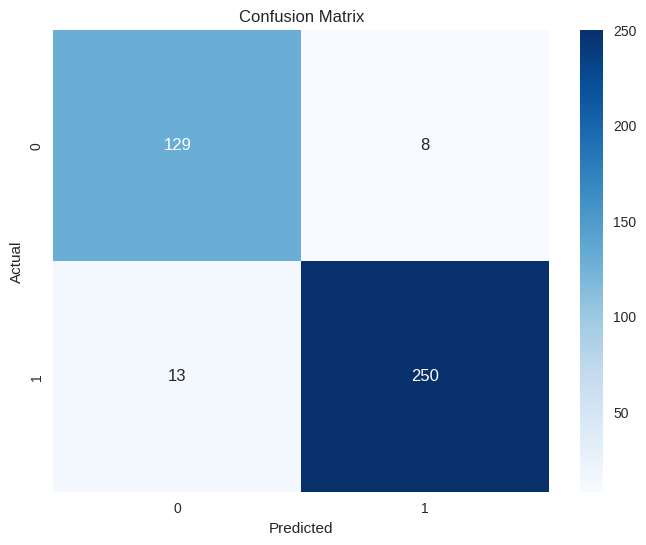

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       137
           1       0.97      0.95      0.96       263

    accuracy                           0.95       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.95      0.95      0.95       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9475,0.9866,0.9582,0.9618,0.9600,0.8836,0.8837


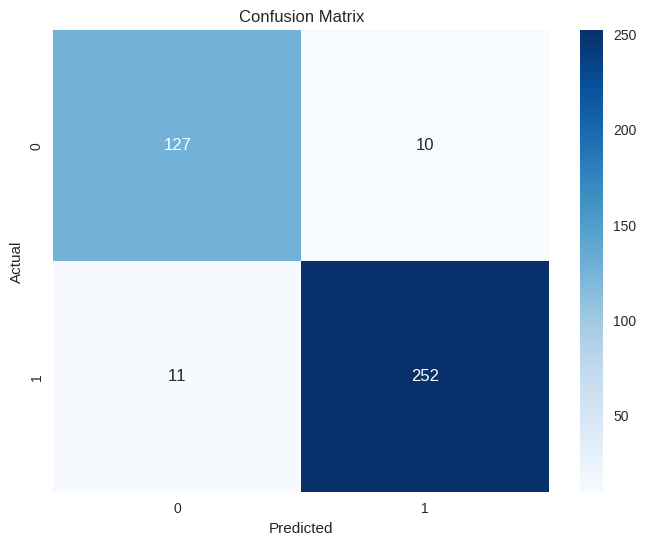

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       137
           1       0.96      0.96      0.96       263

    accuracy                           0.95       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.95      0.95       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9400,0.9410,0.9506,0.9579,0.9542,0.8672,0.8673


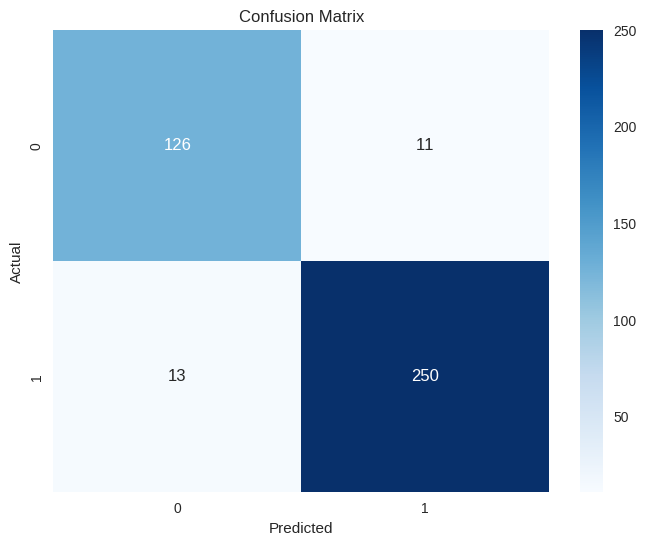

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       137
           1       0.96      0.95      0.95       263

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8800,0.9449,0.8783,0.9352,0.9059,0.7408,0.7436


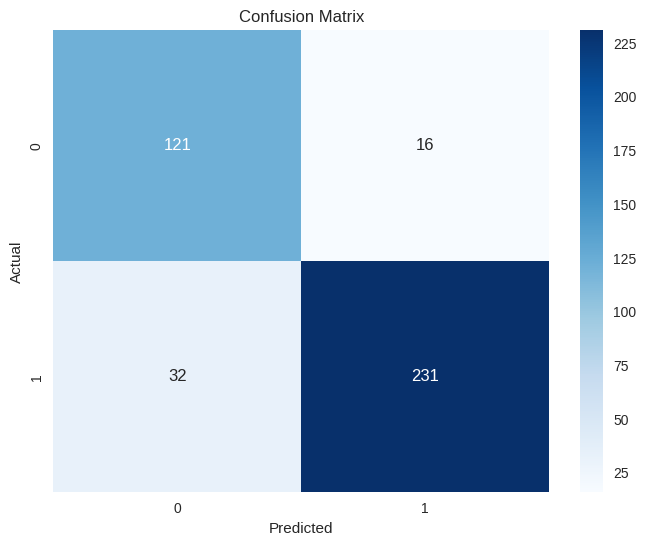

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       137
           1       0.94      0.88      0.91       263

    accuracy                           0.88       400
   macro avg       0.86      0.88      0.87       400
weighted avg       0.89      0.88      0.88       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8900,0.9563,0.9125,0.9195,0.9160,0.7566,0.7567


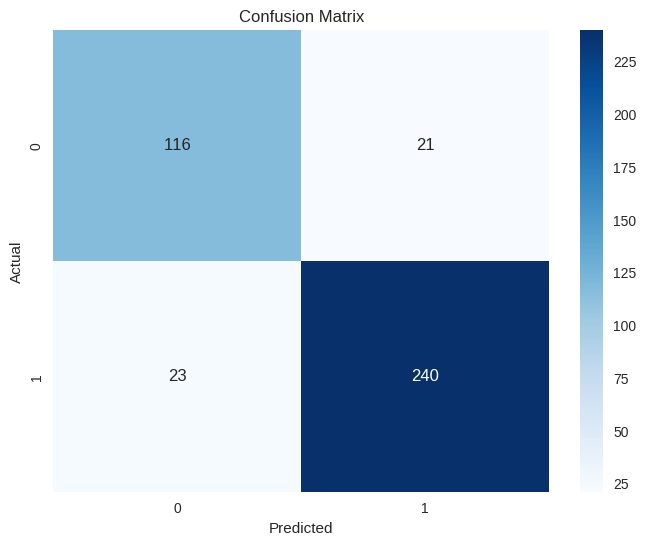

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       137
           1       0.92      0.91      0.92       263

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8750,0.9518,0.8935,0.9144,0.9038,0.7253,0.7257


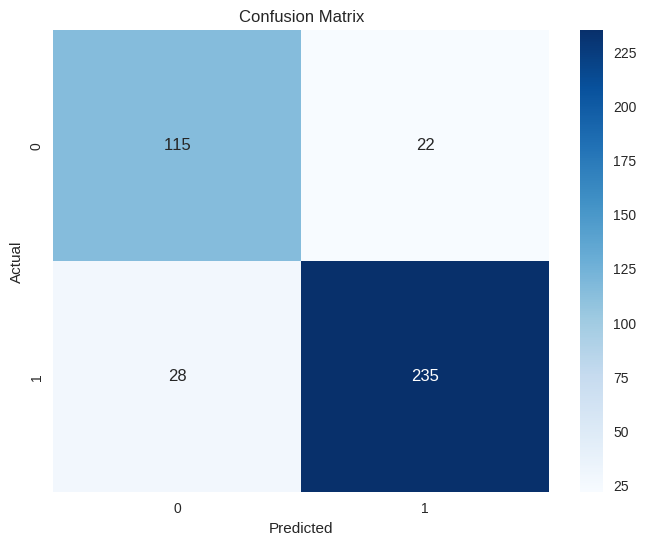

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       137
           1       0.91      0.89      0.90       263

    accuracy                           0.88       400
   macro avg       0.86      0.87      0.86       400
weighted avg       0.88      0.88      0.88       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8825,0.9308,0.8935,0.9252,0.9091,0.7432,0.7441


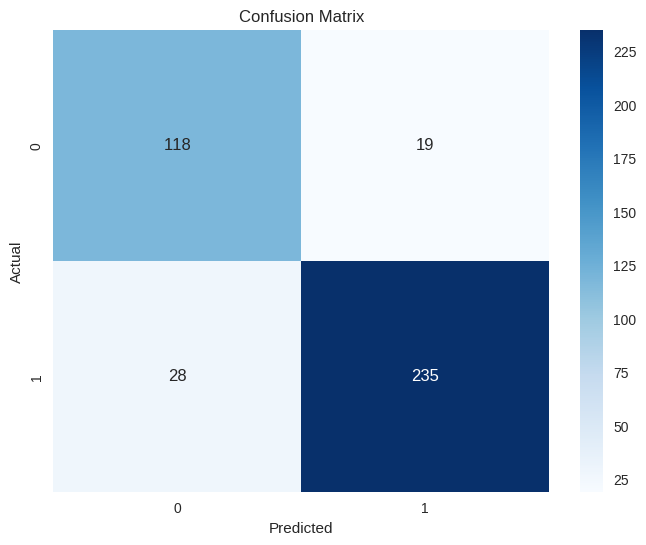

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       137
           1       0.93      0.89      0.91       263

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.89      0.88      0.88       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8675,0.8660,0.8707,0.9234,0.8963,0.7133,0.7157


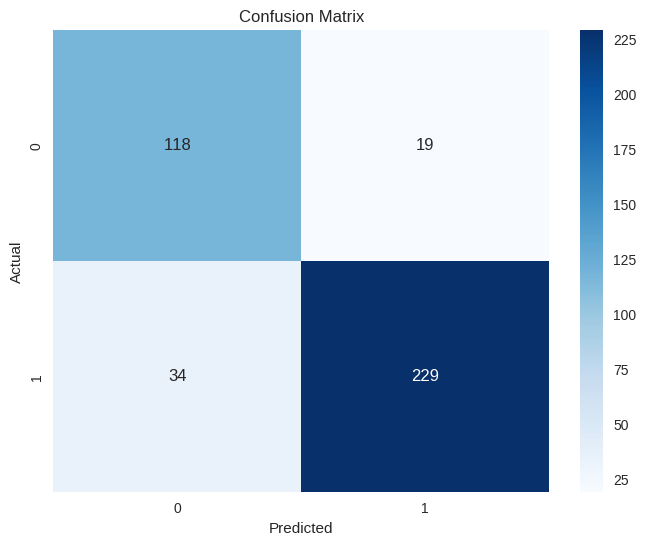

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       137
           1       0.92      0.87      0.90       263

    accuracy                           0.87       400
   macro avg       0.85      0.87      0.86       400
weighted avg       0.87      0.87      0.87       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8675,0.9458,0.8707,0.9234,0.8963,0.7133,0.7157


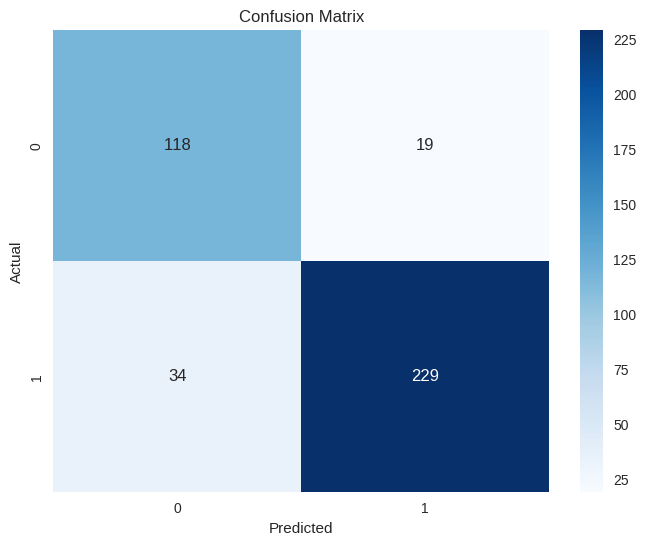

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       137
           1       0.92      0.87      0.90       263

    accuracy                           0.87       400
   macro avg       0.85      0.87      0.86       400
weighted avg       0.87      0.87      0.87       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8550,0.8425,0.8821,0.8958,0.8889,0.6803,0.6805


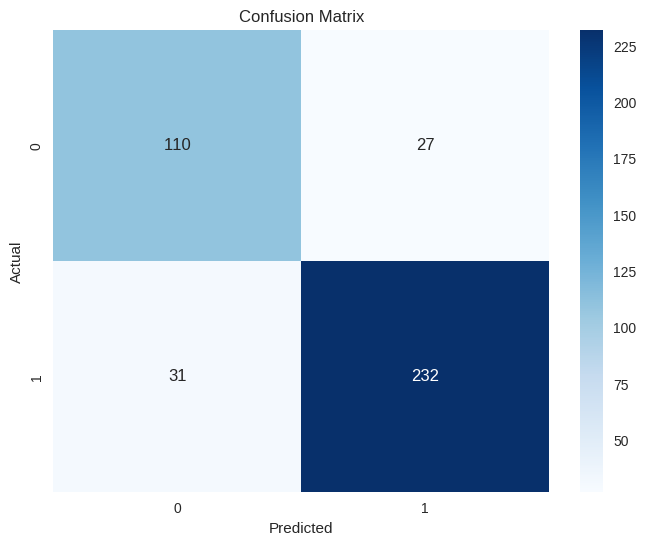

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       137
           1       0.90      0.88      0.89       263

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.86      0.85      0.86       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7400,0.8658,0.6996,0.8804,0.7797,0.4725,0.4913


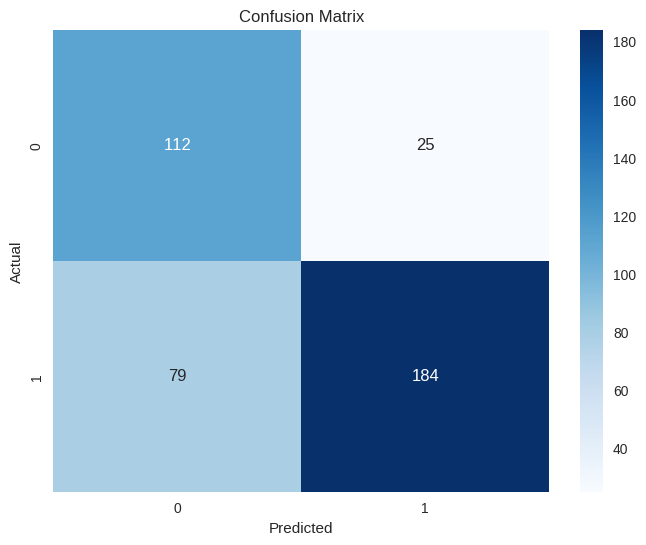

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.82      0.68       137
           1       0.88      0.70      0.78       263

    accuracy                           0.74       400
   macro avg       0.73      0.76      0.73       400
weighted avg       0.78      0.74      0.75       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


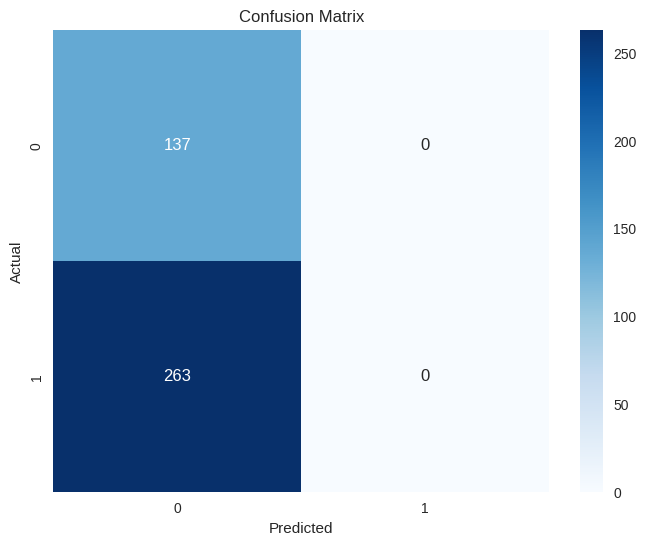

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

evaluation_data_df = test_data_df
y_true = evaluation_data_df[target]
for final_model in final_models:
  y_pred = predict_model(final_model, data=evaluation_data_df)['prediction_label']

  cm = confusion_matrix(y_true, y_pred)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  print("Classification Report:")
  print(classification_report(y_true, y_pred))


In [ ]:
final_models[3]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['gender', 'last_6_months',
                                             'partner_gender_Male',
                                             'partner_gender_Female',
                                             'partner_gender_Both',
                                             'partner_gender_Non-binary',
                                             'partner_multiple',
                                             'sex_kind_gender_Oral',
                                             'sex_kind_gender_Vaginal',
                                             'sex_kind_gender_Anal',
                                             'partner_discuss',
                                             'partner_hiv_...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


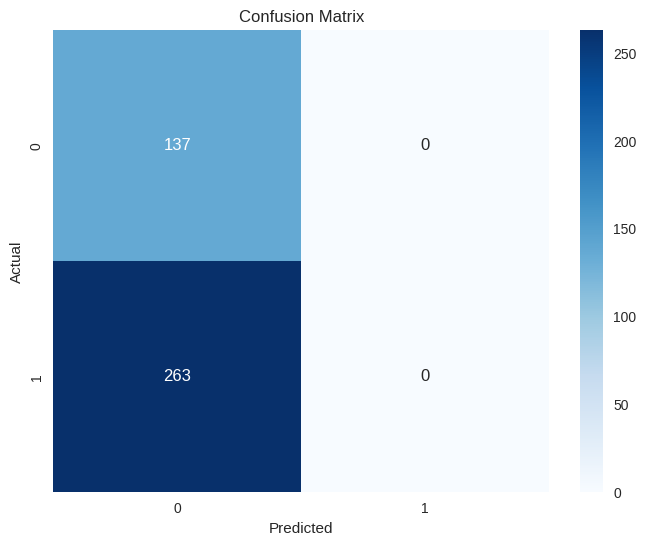

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


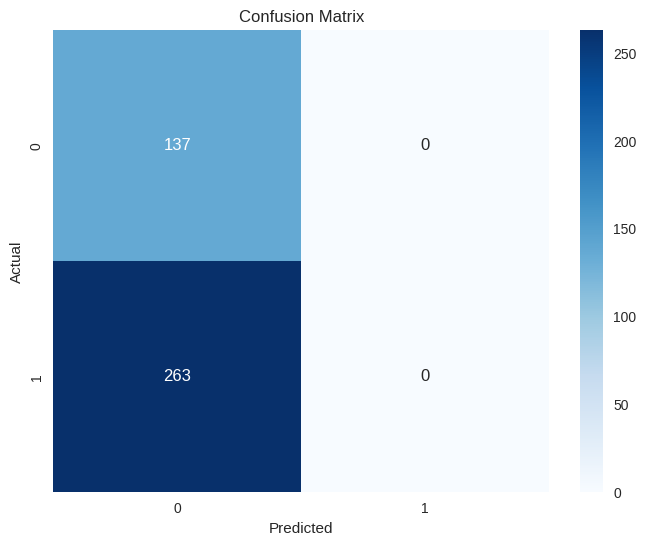

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


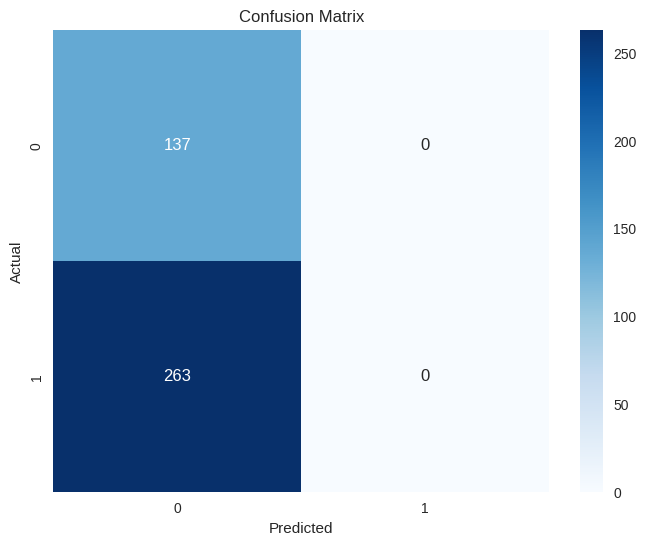

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


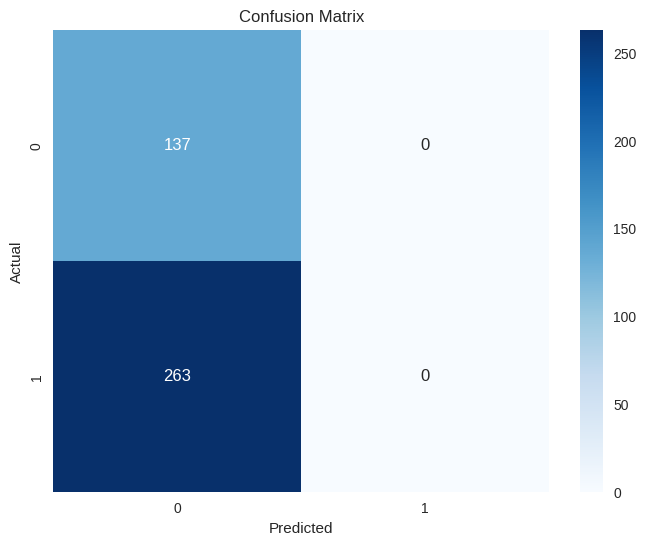

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


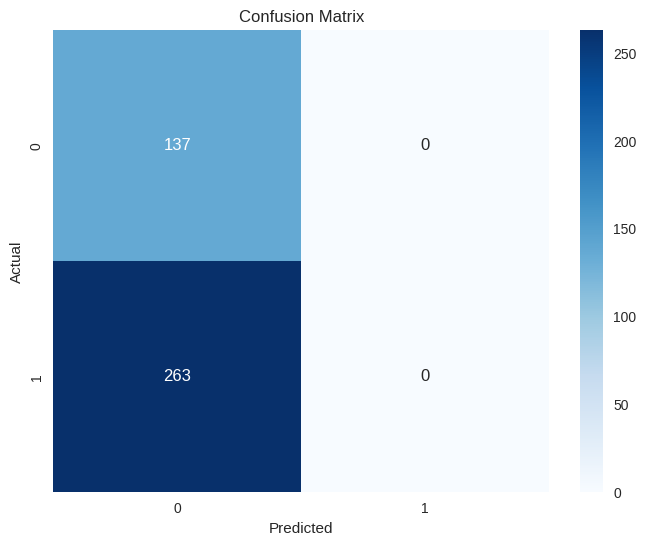

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


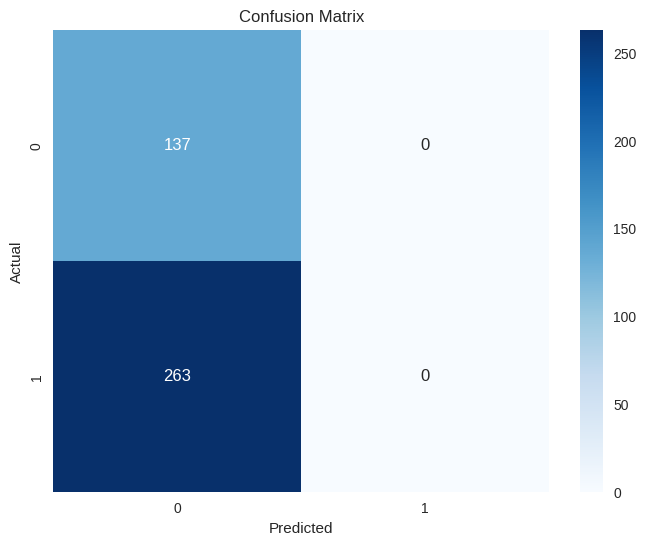

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


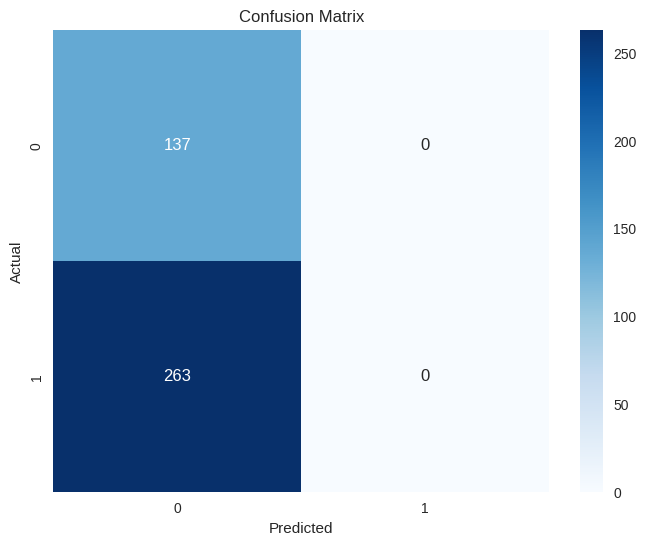

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


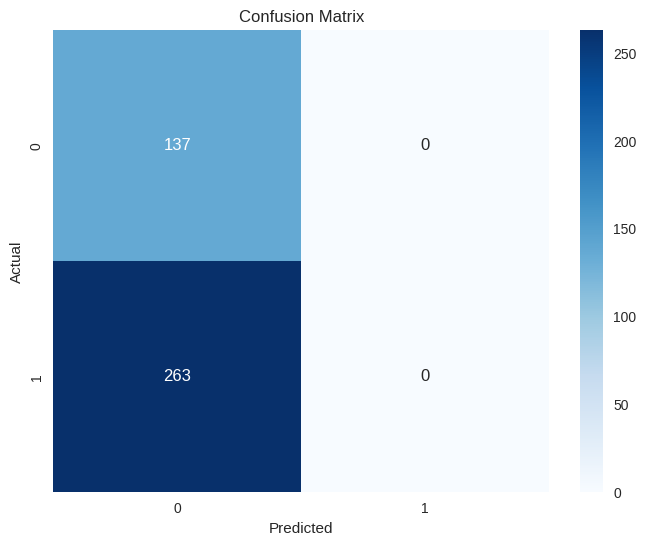

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


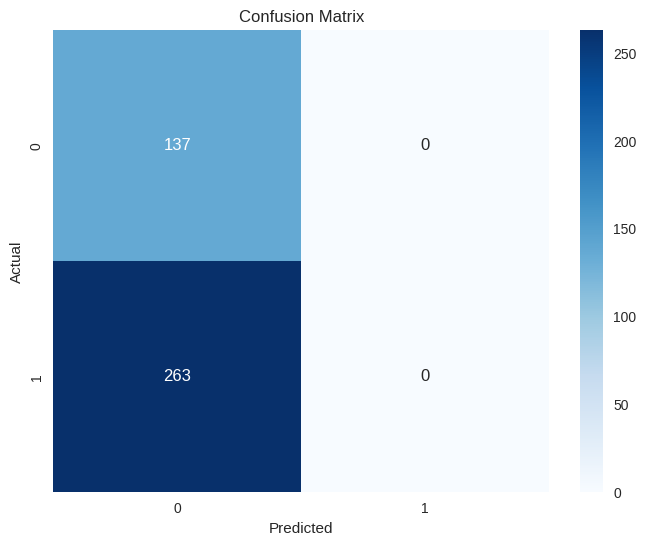

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


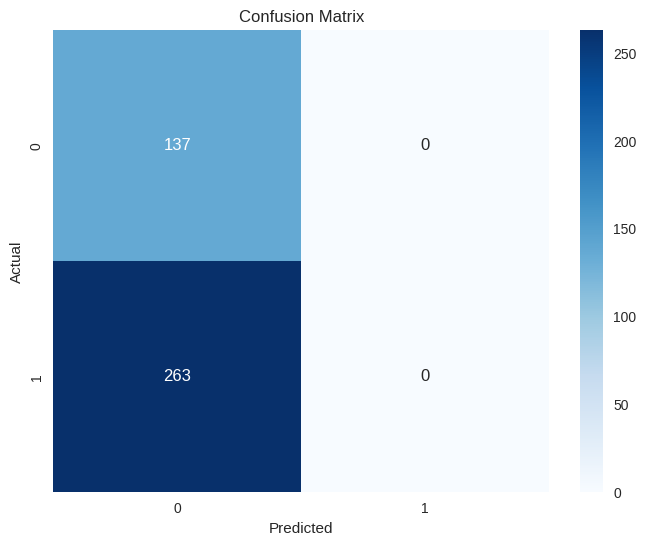

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


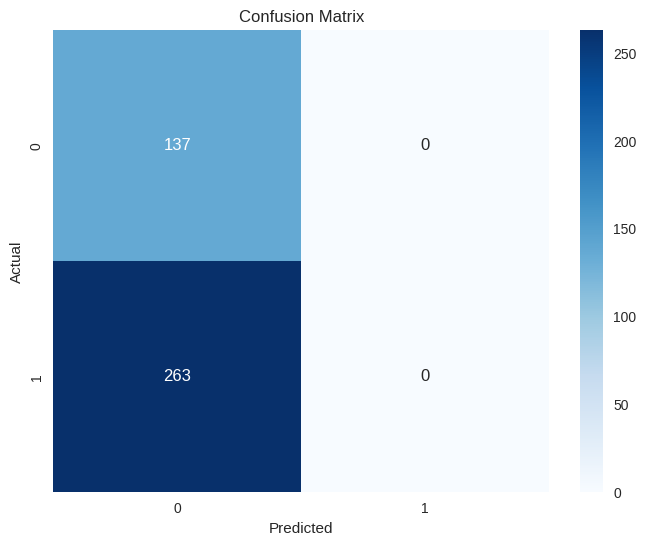

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


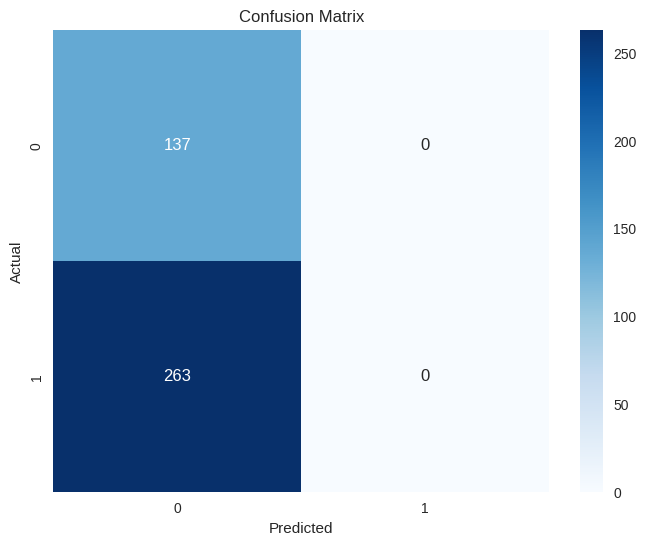

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


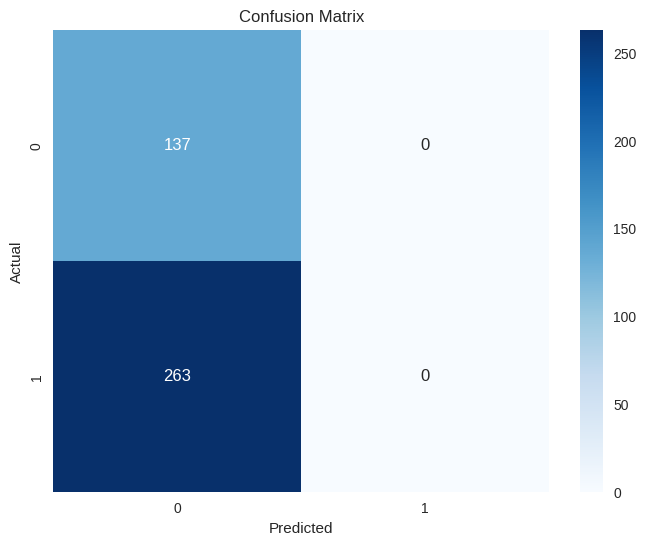

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


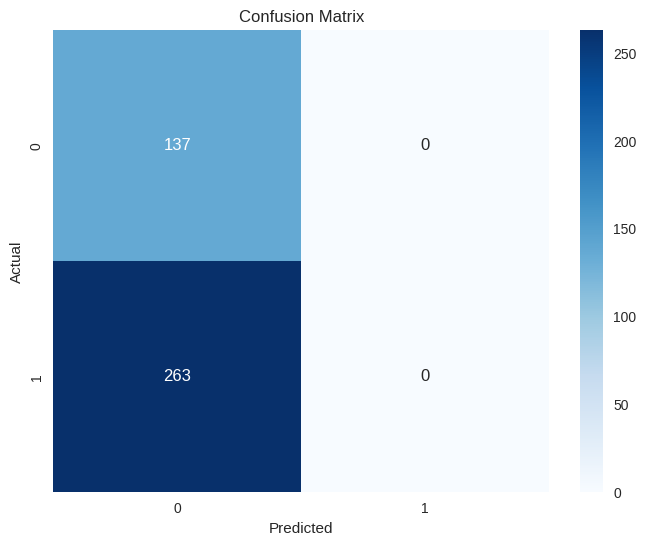

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


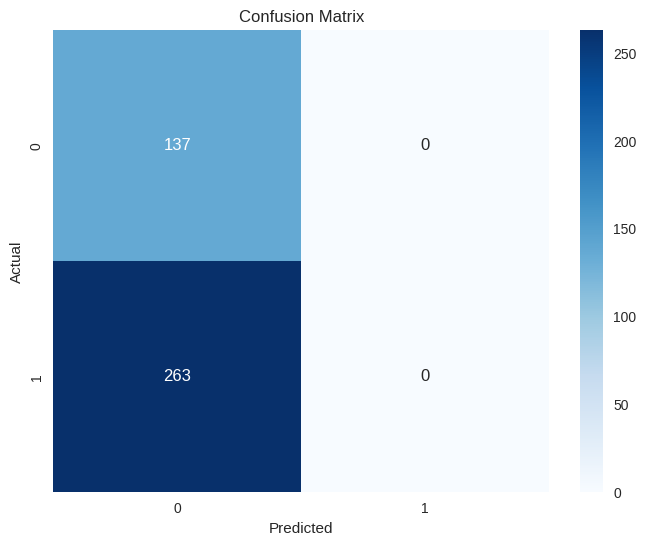

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



In [ ]:
evaluation_data_df = test_data_df
y_true = evaluation_data_df[target]

for model in final_models:
  y_pred = predict_model(final_model, data=evaluation_data_df)['prediction_label']

  # Step 7: Calculate confusion matrix
  cm = confusion_matrix(y_true, y_pred)

  # Step 8: Visualize the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Optional: Print classification report for detailed metrics
  print("Classification Report:")
  print(classification_report(y_true, y_pred))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.3425,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


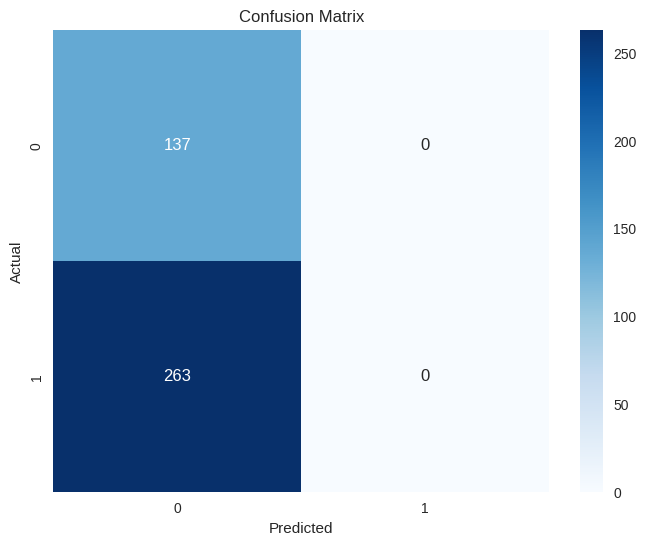

Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       137
           1       0.00      0.00      0.00       263

    accuracy                           0.34       400
   macro avg       0.17      0.50      0.26       400
weighted avg       0.12      0.34      0.17       400



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Generate predictions for test data
y_true = evaluation_data_df[target]
y_pred = predict_model(final_model, data=evaluation_data_df)['prediction_label']


# Step 7: Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 8: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9475,0.9848,0.9506,0.9690,0.9597,0.8844,0.8848


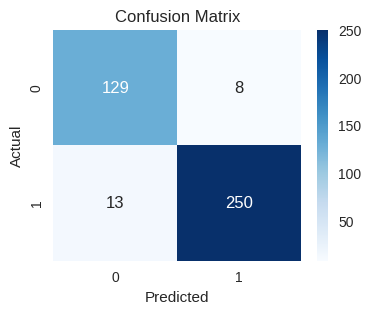

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       137
           1       0.97      0.95      0.96       263

    accuracy                           0.95       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.95      0.95      0.95       400



In [ ]:
evaluation_data_df = test_data_df
y_true = evaluation_data_df[target]
final_model = final_models[3]

y_pred = predict_model(final_model, data=evaluation_data_df)['prediction_label']

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred))

In [ ]:
final_models[3]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['gender', 'last_6_months',
                                             'partner_gender_Male',
                                             'partner_gender_Female',
                                             'partner_gender_Both',
                                             'partner_gender_Non-binary',
                                             'partner_multiple',
                                             'sex_kind_gender_Oral',
                                             'sex_kind_gender_Vaginal',
                                             'sex_kind_gender_Anal',
                                             'partner_discuss',
                                             'partner_hiv_...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

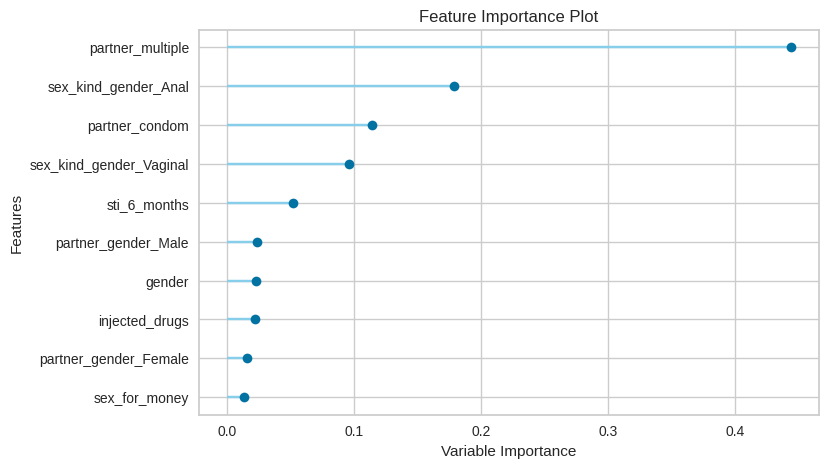

In [ ]:
# Import necessary functions
from pycaret.classification import plot_model

# Finalize the best model
# final_model = final_models[0]
final_model = final_models[3]

# Plot feature importance
plot_model(final_model, plot='feature')

## Prediction

In [ ]:
def clientprofiledict2inputdf(client_profile):
  # print(client_profile.keys())

  # dict -> df with 12 original keys
  encoded_client_profile_df = pd.DataFrame([client_profile])
  # print(encoded_client_profile_df.keys())

  # df -> df with keys converting and and values 0,1,2,3, ..
  encoded_client_profile_df = df2dfencode(encoded_client_profile_df)
  # print(encoded_client_profile_df.keys())

  return encoded_client_profile_df

def MLEvaluate_HIV_risk(client_profile):

    encoded_client_profile_df = clientprofiledict2inputdf(client_profile)

    # print(len(encoded_client_profile_df.keys()), encoded_client_profile_df)

    predictions = predict_model(final_model, data=encoded_client_profile_df)

    return predictions['prediction_label'].values, predictions['prediction_score'].values

In [ ]:
client_profile = {
    'gender': 'Man',
    'last_6_months': 'Yes',
    'partner_gender': 'Both',
    'partner_multiple': 'Yes',
    'sex_kind': 'Oral',
    'partner_discuss': 'No',
    'partner_hiv_status': 'Always',
    'partner_condom': 'Always',
    'sti_6_months': 'Yes',
    'injected_drugs': 'Yes',
    'sex_party': 'No',
    'sex_for_money': 'No',
    'doctor_6': '0%'
}

MLPrEP_prediction_label, MLPrEP_prediction_score = MLEvaluate_HIV_risk(client_profile)

print(f"Recomendation Score is {MLPrEP_prediction_label[0]} with the score {MLPrEP_prediction_score[0]}")

Recomendation Score is 0 with the score 0.9733


#Generative AI

In [ ]:
def MLPrEPinterpretation(MLPrEP_prediction_label, MLPrEP_prediction_score):

    if MLPrEP_prediction_label[0] == 0:
        PrEP_YesNo = "Do not Recommend"
    elif MLPrEP_prediction_label[0] == 1:
        PrEP_YesNo = "Recommend PrEP"
    else:
        PrEP_YesNo = "Strongly Recommend PrEP"

    PrEP_YesNo_score = MLPrEP_prediction_score[0]

    return PrEP_YesNo, PrEP_YesNo_score

def generate_prep_prompt(client_info, yesno_recommendation, yesno_recommendation_score, concerns=""):

    """Generate a prompt for the LLM recommendation."""
    prompt = f"""
    You are a healthcare professional tasked with evaluating the suitability of PrEP (pre-exposure prophylaxis) for individuals based on their risk factors.

    PrEP is a preventive medication for individuals who are HIV-negative and at high risk of HIV exposure through sexual activity or injection drug use. It is not suitable for individuals who are HIV-positive.

    PrEP is recommended for anyone with HIV negative and:
    - Condomless vaginal or anal sex with a partner of unknown HIV status
    - HIV-positive sex partner (especially if partner's HIV viral load is detectable or unknown)
    - A recent bacterial sexually transmitted infection (STI) (gonorrhea/chlamydia/syphilis)
    - Injection drug use with sharing of needles/equipment
    - Any survival/transactional sex
    - Desire to conceive with a partner who is HIV-positive

    With Contraindications
    - HIV infection
    - Weight < 77 lbs
    - Estimated creatinine clearance (eCrCl) < 60 mL/min for TDF/FTC or < 30 mL/min for TAF/FTC
    - Possible HIV exposure within the past 72 hours: instead offer nPEP, then consider PrEP

    Provided Client Information:
    {client_info}

    Other Concerns:
    {concerns}

    Evaluate whether PrEP is recommended and provide a clear, simple explanation. If concern mentioned, please explain how might related to HIV. Also compare the result with the result from ML is {yesno_recommendation}.
    If both agree, give a recomendation. If not, find a way to explain.
    """

    return prompt

In [ ]:
PrEP_YesNo, PrEP_YesNo_score = MLPrEPinterpretation(MLPrEP_prediction_label, MLPrEP_prediction_score)

# Integration of Machine Learning and AI

In [ ]:
import pandas as pd

def rename_client_info_keys(client_profile):
  # Mapping of original keys to more meaningful keys
  key_mapping = {
      "gender": "gender_identity",
      "last_6_months": "sexual_activity_last_6_months",
      "partner_gender": "partner_gender",
      "partner_multiple": "multiple_sexual_partners",
      "sex_kind": "types_of_sexual_contact",
      "partner_discuss": "discuss_sti_hiv_prevention_with_partner",
      "partner_hiv_status": "know_partner_hiv_status",
      "partner_condom": "condom_usage_frequency",
      "sti_6_months": "sti_diagnosis_last_6_months",
      "injected_drugs": "injected_drugs",
      "sex_party": "participate_in_chemsex_parties",
      "sex_for_money": "sex_worker_status",
  }

  # Create a new dictionary with updated keys
  rename_client_profile = {key_mapping.get(k, k): v for k, v in client_profile.items()}

  return rename_client_profile

# https://aidsetc.org/prep#:~:text=PrEP%20is%20recommended%20for%20anyone,load%20is%20detectable%20or%20unknown)


In [ ]:
client_profile = {
    'gender': 'Man',
    'last_6_months': 'Yes',
    'partner_gender': 'Both',
    'partner_multiple': 'Yes',
    'sex_kind': 'Oral',
    'partner_discuss': 'No',
    'partner_hiv_status': 'Always',
    'partner_condom': 'Always',
    'sti_6_months': 'Yes',
    'injected_drugs': 'Yes',
    'sex_party': 'No',
    'sex_for_money': 'No'
}

MLPrEP_prediction_label, MLPrEP_prediction_score = MLEvaluate_HIV_risk(client_profile)

prompt = generate_prep_prompt(client_profile, MLPrEP_prediction_label, MLPrEP_prediction_score, concerns="")

rename_client_profile = rename_client_info_keys(client_profile)

In [ ]:
# Initialize OpenAI client
from openai import OpenAI
from google.colab import userdata

OPENAI_API_KEY = userdata.get('PrEP_recommendation')
client = OpenAI(api_key=OPENAI_API_KEY)

In [ ]:
def get_llm_recommendation(client_profile, PrEP_YesNo, PrEP_YesNo_score, concerns="", temperature=0.5):

    rename_client_profile = rename_client_info_keys(client_profile)

    client_profile_prompt = generate_prep_prompt(client_profile, PrEP_YesNo, round(PrEP_YesNo_score, 2), concerns)

    # Get Risk Factors
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "Summarize the client factors in 1 sentence by listing unsafe factors and safe factors of getting STIs and HIV."},
                {"role": "user", "content":  str(rename_client_profile)},
            ],
            temperature=temperature
        )
        risk_factors_explaination = response.choices[0].message.content
    except Exception as e:
        risk_factors_explaination = f"An error occurred: {str(e)}"

    # LLM recomendation
    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are a professional healthcare assistant."},
                {"role": "user", "content": client_profile_prompt},
            ],
            temperature=temperature  # Configurable creativity
        )
        detailed_recommendation = response.choices[0].message.content
    except Exception as e:
        detailed_recommendation = f"An error occurred: {str(e)}"

    explainations = {
        "risk_factors_explaination": risk_factors_explaination,
        "detailed_recommendation": detailed_recommendation
    }

    return risk_factors_explaination, detailed_recommendation


def make_prediction_and_recommend(client_profile, concerns="", temperature=0.9):

    MLPrEP_prediction_label, MLPrEP_prediction_score = MLEvaluate_HIV_risk(client_profile)

    PrEP_YesNo, PrEP_YesNo_score = MLPrEPinterpretation(MLPrEP_prediction_label, MLPrEP_prediction_score)

    risk_factors_explaination, detailed_recommendation = get_llm_recommendation(client_profile, PrEP_YesNo, PrEP_YesNo_score, concerns=concerns, temperature=temperature)

    # print(str(round(PrEP_YesNo_score, 2)))

    results = {
        "PrEP_YesNo": PrEP_YesNo,
        "PrEP_YesNo_score": str(round(PrEP_YesNo_score, 2)),
        "risk_factors_explaination": risk_factors_explaination,
        "detail_recommendation": detailed_recommendation
    }

    return results

In [ ]:
client_profile = {
    'gender': 'Man',
    'last_6_months': 'Yes',
    'partner_gender': 'Both',
    'partner_multiple': 'Yes',
    'sex_kind': 'Oral',
    'partner_discuss': 'No',
    'partner_hiv_status': 'Always',
    'partner_condom': 'Always',
    'sti_6_months': 'Yes',
    'injected_drugs': 'Yes',
    'sex_party': 'No',
    'sex_for_money': 'No'
}

In [ ]:
result = make_prediction_and_recommend(client_profile, concerns="", temperature=0.9)
result

{'PrEP_YesNo': 'Do not Recommend',
 'PrEP_YesNo_score': '0.97',
 'risk_factors_explaination': "Unsafe factors include having sexual activity in the last 6 months, having multiple sexual partners, engaging in oral sex, not discussing STI/HIV prevention with partners, having an STI diagnosis in the last 6 months, and injecting drugs; safe factors include always knowing the partner's HIV status, always using condoms, not participating in chemsex parties, and not being a sex worker.",
 'detail_recommendation': 'Based on the provided client information, let\'s evaluate the suitability for PrEP (pre-exposure prophylaxis) use:\n\n### Evaluation:\n1. **Condomless Sex:** The client reports using condoms ("Always") with partners, so on this basis, PrEP would not typically be recommended.\n2. **Partner HIV Status:** The client does not discuss HIV status with partners ("No"). This creates uncertainty about the HIV status of partners, which could increase risk if condoms are not used consistently.

# API FOR TEST

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import markdown

# Data features for dropdowns
data_features = {
    "gender": ["Man", "Woman", "Trans man", "Trans Woman", "Non-binary", "Prefer not to answer"],
    "last_6_months": ["No", "Yes"],
    "partner_gender": ["Male", "Female", "Both", "Non-binary"],
    "partner_multiple": ["No", "Yes"],
    "sex_kind": ["Anal", "Vaginal",  "Oral"],
    "partner_discuss": ["No", "Yes"],
    "partner_hiv_status": ["I don’t ask", "Sometimes", "Always"],
    "partner_condom": ["Rarely or never", "Sometimes", "Always"],
    "sti_6_months": ["Never", "Unsure", "Yes"],
    "injected_drugs": ["Never", "Yes"],
    "sex_party": ["No", "Yes"],
    "sex_for_money": ["No", "Prefer Not to answer", "Yes"],
    # "doctor_6": ["25%", "50%", "75%", "100%", "0%"]
}

# Create input widgets dynamically
input_widgets = {feature: widgets.Dropdown(options=options, description=f"{feature}:")
                 for feature, options in data_features.items()}

# Display all widgets
for widget in input_widgets.values():
    display(widget)

# Add text input for additional notes
text_input = widgets.Text(
    description="Additional Notes:",
    layout=widgets.Layout(width="50%")
)
display(text_input)

# Add submit button
submit_button = widgets.Button(
    description="Submit",
    button_style='success',
    tooltip="Click to generate recommendation",
    icon="check"
)
display(submit_button)

# Add styled HTML widget for displaying recommendations
recommendation_output = widgets.HTML(
    value="<b></b>",
    placeholder="Recommendation will appear here.",
    description="",
    layout=widgets.Layout(
        padding='10px',
        border='1px solid black',
        background_color="#f9f9f9",
        width='90%',
        border_radius="8px"
    )
)
display(recommendation_output)

def on_submit_clicked(b):
    try:
        # Collect user inputs
        client_profile = {feature: widget.value for feature, widget in input_widgets.items()}
        concerns = text_input.value

        # Generate recommendation
        result = make_prediction_and_recommend(client_profile, concerns=concerns, temperature=0.9)

        # Extract results with fallback defaults
        PrEP_YesNo = result.get("PrEP_YesNo", "Not Available")
        PrEP_YesNo_score = result.get("PrEP_YesNo_score", "Not Available")
        risk_factors_explaination = result.get(
            "risk_factors_explaination", "No risk factors explained."
        )
        detailed_recommendation = result.get(
            "detail_recommendation", "No detailed recommendation available."
        )

        # Structuring the Markdown content
        # recommendation_markdown = f"""
        #   # PrEP Recommendation

        #   ## PrEP Eligibility
        #   **Recommendation:** {PrEP_YesNo}
        #   **Score:** {PrEP_YesNo_score}

        #   ## Risk Factors Analysis
        #   {risk_factors_explaination}

        #   ## Detailed Recommendation
        #   {detailed_recommendation}
        # """

        # # Convert Markdown to HTML
        # recommendation_html = markdown.markdown(recommendation_markdown)

        # Style the output for better readability
        recommendation_output.value = f"""
        <div style='font-family: Arial, sans-serif; font-size: 14px; line-height: 1.6; padding: 15px; background-color: #f9f9f9; border: 1px solid #ccc; border-radius: 8px;'>
            <h1 style='font-size: 18px; color: #333;'>PrEP Recommendation</h1>
            <h2 style='font-size: 16px; color: #555;'>PrEP Eligibility</h2>
            <p><strong>Recommendation:</strong> {PrEP_YesNo}</p>
            <p><strong>Score:</strong> {PrEP_YesNo_score}</p>
            <h2 style='font-size: 16px; color: #555;'>Risk Factors Analysis</h2>
            <pre style='white-space: pre-wrap; background-color: #fff; padding: 10px; border: 1px solid #ddd; border-radius: 4px;'>{risk_factors_explaination}</pre>
            <h2 style='font-size: 16px; color: #555;'>Detailed Recommendation</h2>
            <pre style='white-space: pre-wrap; background-color: #fff; padding: 10px; border: 1px solid #ddd; border-radius: 4px;'>
                {markdown.markdown(detailed_recommendation)}
            </div>
        </div>
        """

    except Exception as e:
        # Display error in red
        recommendation_output.value = f"<b style='color: red;'>Error:</b> {e}"


# Link button click event to the handler
submit_button.on_click(on_submit_clicked)